In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [148]:
dataset = pd.read_csv("/content/drive/MyDrive/TSLA.csv")

In [149]:
dataset.head(10)

Date       Open       High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.000000  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.420000  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.920000  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.100000  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.000000  15.830000  16.110001  16.110001   6866900
5  2010-07-07  16.400000  16.629999  14.980000  15.800000  15.800000   6921700
6  2010-07-08  16.139999  17.520000  15.570000  17.459999  17.459999   7711400
7  2010-07-09  17.580000  17.900000  16.549999  17.400000  17.400000   4050600
8  2010-07-12  17.950001  18.070000  17.000000  17.049999  17.049999   2202500
9  2010-07-13  17.389999  18.639999  16.900000  18.139999  18.139999   2680100

In [150]:
dataset.shape

(2416, 7)

In [151]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [152]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [153]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 132.2 KB


In [154]:
dataset.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

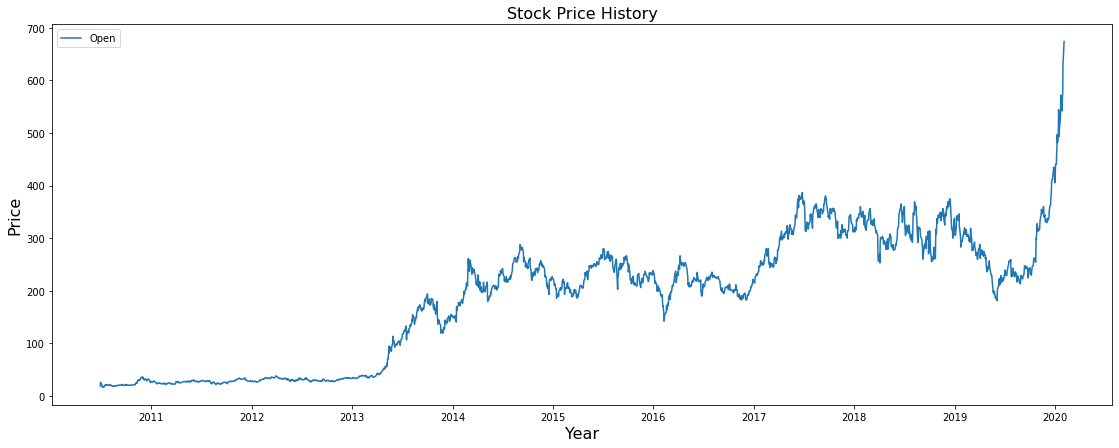

In [155]:
X = dataset['Date']
Y = dataset['Open']

plt.figure(figsize=(19,7))
plt.plot(X,Y)
plt.title('Stock Price History', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.legend(['Open'], loc='upper left')

plt.show()

Predicting using linear regression

In [156]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [157]:
X = dataset[['High', 'Low', 'Open', 'Volume']].values
Y = dataset[['Close']].values

In [158]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=3)

In [159]:
from sklearn.linear_model  import LinearRegression

In [160]:
lm = LinearRegression()

In [161]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
print(predicted)

[ 31.11954198 225.28719486 257.96837129 212.84800246 214.54009733
 341.99559054  32.6005892  227.71583675  30.87502894 245.67761216
 350.16527759  29.55995117 180.70056127 212.73006245  23.76256389
 194.02069778 229.51993443 315.3478516  196.73020334 200.31640297
  31.4230833  282.59081886 195.48736967 243.54842995 477.77908942
 324.36122716 274.85357549 176.62774674 376.75563727  33.76771386
 345.99063085  26.95839239 222.14620806 335.20452173  34.04127718
 232.03362669  27.53506448 313.59305071 219.37325948 255.26117748
 341.37859006  35.95358729  28.41689739 191.2299926  206.28209065
 206.54823124 337.51070885  27.26986523 238.77897965 207.82158573
  24.08606086 347.08926898 254.87494769 239.84500777 350.07222005
 226.25617854 264.17625247 262.73158901 189.64551336  31.62930397
  28.40746932 273.20724871  33.75285099  29.04156678  29.32623503
 343.14153893 150.62914813 301.23664895  31.01392284 333.37797157
  22.19201178 204.69523914  26.60054263  27.3268847   32.27111967
 259.37702

In [163]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predicted.flatten()})

In [164]:
df.head(10)

Actual   Predicted
0   31.330000   31.119542
1  225.710007  225.287195
2  256.950012  257.968371
3  208.880005  212.848002
4  211.000000  214.540097
5  339.529999  341.995591
6   32.240002   32.600589
7  229.729996  227.715837
8   31.340000   30.875029
9  247.570007  245.677612

In [165]:
mae = metrics.mean_absolute_error(y_test, predicted)
print('Mean absolute error = ', mae)
mse = metrics.mean_squared_error(y_test, predicted)
print('Mean squared error = ', mse)
rmse = np.sqrt(mse)
print('Root mean square error = ',rmse)

Mean absolute error =  1.382744760645343
Mean squared error =  4.5628188098139075
Root mean square error =  2.136075562758468


In [166]:
df.corr()

Actual  Predicted
Actual     1.000000   0.999843
Predicted  0.999843   1.000000

In [167]:
graph = df.head(75)

Text(0, 0.5, 'Price')

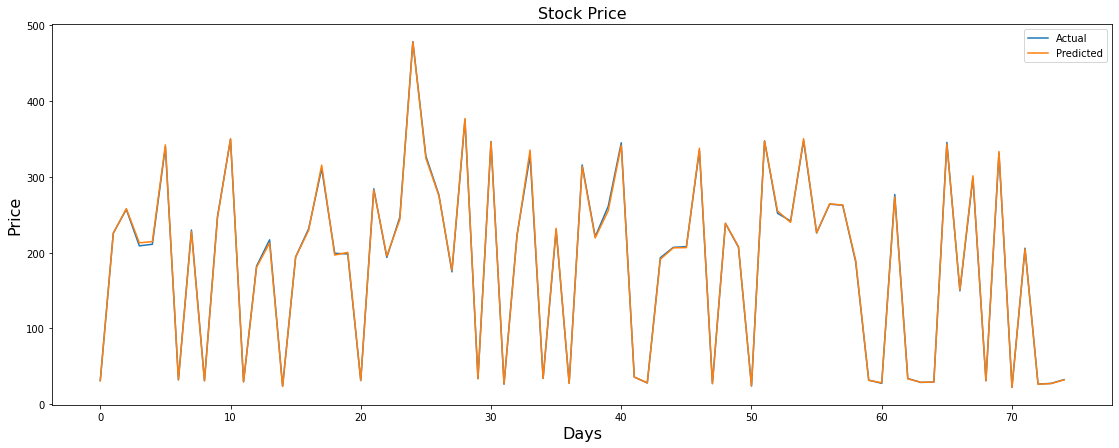

In [168]:
graph.plot(kind='line', figsize=(19,7))
plt.title('Stock Price', fontsize=16)
plt.xlabel('Days', fontsize=16)
plt.ylabel('Price', fontsize=16)

Text(0.5, 1.0, 'Stock Price')

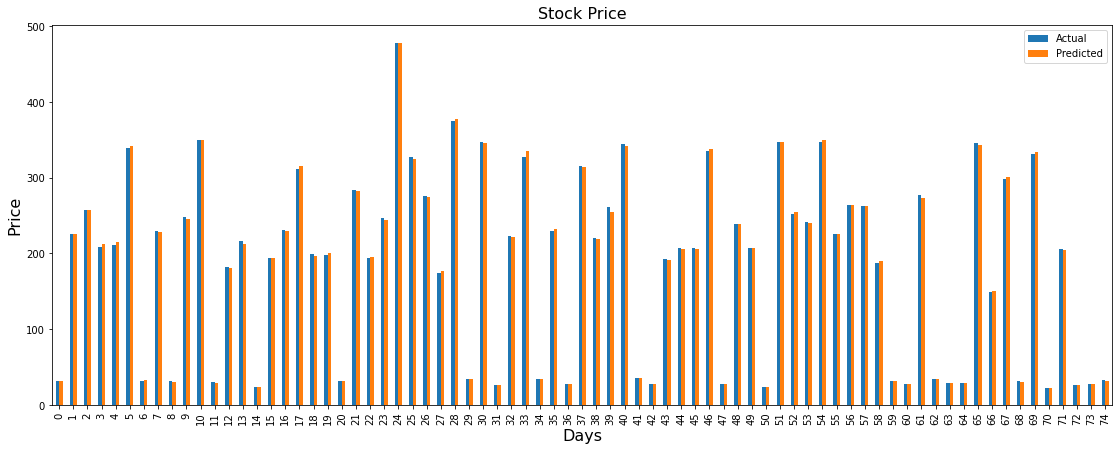

In [169]:
graph.plot(kind='bar', figsize=(19,7))
plt.ylabel('Price', fontsize=16)
plt.xlabel('Days', fontsize=16)
plt.title('Stock Price', fontsize=16)

Predicting using LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
training_data = dataset['Open']
training_data = pd.DataFrame(training_data)